In [1]:
#cd t:\freely_moving_ephys\ephys_recordings\101120\G6H28P6LT\hf4_wn
#cd \\niell-v2-w7\freely_moving_ephys\ephys_recordings\092820\J524RT\outputs_Oct07a
#cd t:\freely_moving_ephys\ephys_recordings\101520\G6H28P6LT\fm1


In [2]:
cd t:\freely_moving_ephys\ephys_recordings\112920\G6H27P8LT\fm1

t:\freely_moving_ephys\ephys_recordings\112920\G6H27P8LT\fm1


In [3]:
eye_file =   "101120_G6H28P6LT_hf4_wnReye.nc"
world_file = '101120_G6H28P6LT_hf4_wnworld.nc'
ephys_file = '101120_G6H28P6LT_hf4_wn_ephys.json'

eye_file = '092820_J524RT_whitenoise_hfReye.nc'
world_file = '092820_J524RT_whitenoise_hfworld.nc'
ephys_file = '092820_J524RT_whitenoise_hf_ephys.json'

eye_file =   "101420_G6H28P6LT_hf1_wnReye.nc"
world_file = '101420_G6H28P6LT_hf1_wnworld.nc'
ephys_file = '101420_G6H28P6LT_hf1_wn_ephys_merge.json'

eye_file =   "101420_G6H28P6LT_h2_wn_Reye.nc"
world_file = '101420_G6H28P6LT_h2_wn_world.nc'
ephys_file = '101420_G6H28P6LT_h2_wn_ephys_merge.json'

#name_base = '112920_G6H27P8LT_control_Rig2_hf1_wn'
name_base = '112920_G6H27P8LT_control_Rig2_fm1'

eye_file = name_base + '_Reye.nc'
world_file = name_base + '_world.nc'
ephys_file = name_base + '_ephys_merge.json'

In [4]:
from netCDF4 import Dataset
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import pickle
import time
import subprocess
from matplotlib.animation import FFMpegWriter
import matplotlib as mpl 
import wavio
mpl.rcParams['animation.ffmpeg_path'] = r'C:\Program Files\ffmpeg\bin\ffmpeg.exe'
from scipy.interpolate import interp1d
from numpy import nan

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

In [5]:
# load worldcam
world_data = xr.open_dataset(world_file)
world_vid_raw = np.uint8(world_data['WORLD_video'])



In [6]:
#resize worldcam to make more manageable
sz = world_vid_raw.shape
downsamp = 0.5
world_vid = np.zeros((sz[0],np.int(sz[1]*downsamp),np.int(sz[2]*downsamp)), dtype = 'uint8')
for f in range(sz[0]):
    world_vid[f,:,:] = cv2.resize(world_vid_raw[f,:,:],(np.int(sz[2]*downsamp),np.int(sz[1]*downsamp)))
worldT = world_data.timestamps.copy()
world_data

<xarray.Dataset>
Dimensions:      (frame: 78707, height: 240, width: 320)
Coordinates:
  * frame        (frame) int64 0 1 2 3 4 5 ... 78702 78703 78704 78705 78706
    timestamps   (frame) float64 ...
Dimensions without coordinates: height, width
Data variables:
    WORLD_times  (frame) float64 ...
    WORLD_video  (frame, height, width) int8 23 -110 87 104 ... 104 103 104 105

Text(0.5, 0, 'deltaT')

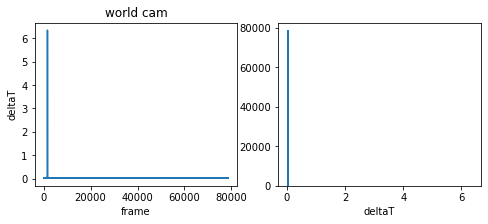

In [7]:
# plot worldcam timing
fig, axs = plt.subplots(1,2,figsize=(8,3))
axs[0].plot(np.diff(worldT)); axs[0].set_xlabel('frame'); axs[0].set_ylabel('deltaT'); axs[0].set_title('world cam')
axs[1].hist(np.diff(worldT),100);axs[1].set_xlabel('deltaT')

Text(0.5, 1.0, 'mean worldcam')

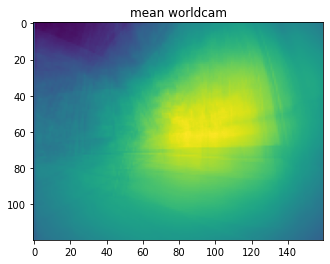

In [8]:
# plot mean world image
plt.imshow(np.mean(world_vid,axis=0)); plt.title('mean worldcam')

In [9]:
# read ephys data
ephys_data = pd.read_json(ephys_file)
ephys_data


Amplitude  ContamPct KSLabel        amp  ch  depth        fr  group  \
0        956.4      200.7     mua  36.922520   1     26  0.262111  noise   
1       2077.1     1885.0     mua  47.425205   5    126  0.150734  noise   
2       3378.9      743.3     mua  63.212212   1     26  0.240072  noise   
3       1565.4      826.7     mua  45.662521   6    151  0.153882  noise   
4       1127.9        0.0     mua  35.895149   5    126  0.058247  noise   
..         ...        ...     ...        ...  ..    ...       ...    ...   
145      445.3      203.4     mua  28.873972  62    751  1.057103  noise   
146     1020.7        9.8    good  89.036011  63    776  1.737569   good   
147      969.6        0.0     mua  75.721573  14    351  0.040537  noise   
148     1696.9      385.7     mua  62.385948  56    601  0.157424  noise   
149     1309.8      377.8     mua  64.670059  56    601  0.121610  noise   

     n_spikes  sh                                           waveform  \
0         666   0  [0.058616187400000005, 0.0478482768, 0.0363571...   
1         383   0  [-0.031187873300000002, -0.027951095300000003,...   
2         610   0  [-0.0460838936, -0.036696355800000004, -0.0248...   
3         391   0  [0.0201107301, 0.030921863400000003, 0.0402362...   
4         148   0  [-0.0084654428, -0.010205132, -0.0152757829, -...   
..        ...  ..                                                ...   
145      2686   0  [-0.0110450601, -0.0111769456, -0.0100713978, ...   
146      4415   0  [0.0464153215, 0.0594753996, 0.0585327782, 0.0...   
147       103   0  [-0.044071547700000005, -0.061173737000000006,...   
148       400   0  [0.0332954153, 0.030354313600000002, 0.0286720...   
149       309   0  [0.0335550457, 0.0307241268, 0.028898343400000...   

                                                spikeT            t0  
0    [25.4938666667, 35.2305, 36.6541666667, 51.581...  44493.633356  
1    [25.4948666667, 37.7632666667, 37.7651, 37.765...  44493.633356  
2    [25.4934666667, 43.2128333333, 43.2134666667, ...  44493.633356  
3    [0.0522, 25.4940333333, 35.7122333333, 35.7296...  44493.633356  
4    [25.4934666667, 37.7641, 52.3106333333, 59.848...  44493.633356  
..                                                 ...           ...  
145  [25.3627, 25.3693, 25.5777666667, 25.6523, 25....  44493.633356  
146  [0.22313333330000001, 0.4263333333, 4.68823333...  44493.633356  
147  [52.3097, 60.2395333333, 60.3432333333, 73.395...  44493.633356  
148  [159.6507666667, 174.0497, 174.1738333333, 174...  44493.633356  
149  [25.6499666667, 25.6518333333, 60.6406333333, ...  44493.633356  

[150 rows x 13 columns]

In [10]:
# get intitial ephys timepoint (t0)
ephysT0 = ephys_data.iloc[0,12]
ephysT0 

44493.633356

In [11]:
# select good cells from phy2
goodcells = ephys_data.loc[ephys_data['group']=='good']
goodcells.shape
units = goodcells.index.values


In [12]:
n_units = len(goodcells)
print(n_units)

37


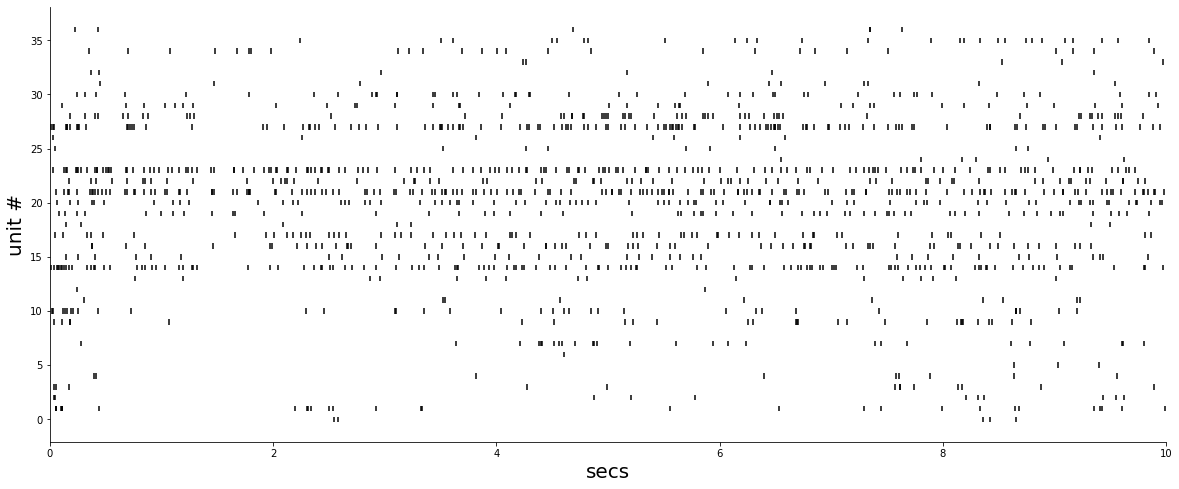

In [13]:
#spike rasters
fig, ax = plt.subplots(figsize=(20,8))
ax.fontsize = 20
for i,ind in enumerate(goodcells.index):
   plt.vlines(goodcells.at[ind,'spikeT'],i-0.25,i+0.25)
   plt.xlim(0, 10); plt.xlabel('secs',fontsize = 20); plt.ylabel('unit #',fontsize=20)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.savefig('spikeraster.pdf')



<xarray.DataArray 'timestamps' (frame: 78706)>
array([44492.71647325, 44492.73107775, 44492.74711625, ...,
       45812.31829075, 45812.33432925, 45812.35036775])
Coordinates:
  * frame       (frame) int64 0 1 2 3 4 5 ... 78701 78702 78703 78704 78705
    timestamps  (frame) float64 4.449e+04 4.449e+04 ... 4.581e+04 4.581e+04

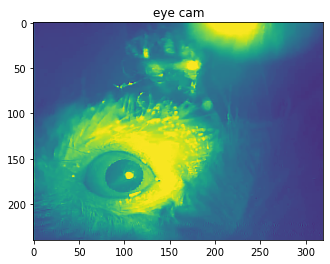

In [14]:
#load eye data
eye_data = xr.open_dataset(eye_file)
eye_vid = np.uint8(eye_data['REYE_video'])
plt.imshow(eye_vid[0,:,:]); plt.title('eye cam')
eyeT = eye_data.timestamps.copy()
eyeT

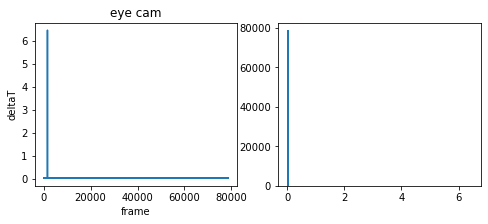

In [15]:
# plot eye timestamps
fig, axs = plt.subplots(1,2,figsize=(8,3))
axs[0].plot(np.diff(eyeT)); axs[0].set_xlabel('frame'); axs[0].set_ylabel('deltaT'); axs[0].set_title('eye cam')
axs[1].hist(np.diff(eyeT),100);

Text(0, 0.5, 'phi')

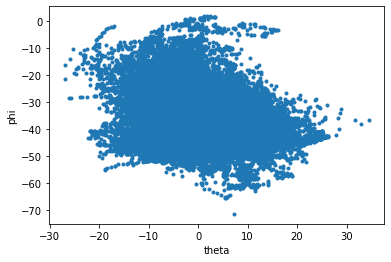

In [16]:
#plot eye postion across recording
eye_params = eye_data['REYE_ellipse_params']
plt.plot(eye_params.sel(ellipse_params = 'theta')*180/3.1415,eye_params.sel(ellipse_params = 'phi')*180/3.1415,'.')
plt.xlabel('theta'); plt.ylabel('phi')

In [17]:
# adjust eye/world/top times relative to ephys
eyeT = eye_data.timestamps  - ephysT0
if eyeT[0]<-600:
    eyeT = eyeT + 8*60*60 # 8hr offset for some data
worldT = world_data.timestamps - ephysT0
if worldT[0]<-600:
    worldT = worldT + 8*60*60
eyeT, worldT

(<xarray.DataArray 'timestamps' (frame: 78706)>
 array([-9.16882750e-01, -9.02278250e-01, -8.86239750e-01, ...,
         1.31868493e+03,  1.31870097e+03,  1.31871701e+03])
 Coordinates:
   * frame       (frame) int64 0 1 2 3 4 5 ... 78701 78702 78703 78704 78705
     timestamps  (frame) float64 4.449e+04 4.449e+04 ... 4.581e+04 4.581e+04,
 <xarray.DataArray 'timestamps' (frame: 78707)>
 array([-9.10277750e-01, -8.87225250e-01, -8.71186750e-01, ...,
         1.31866003e+03,  1.31867851e+03,  1.31869455e+03])
 Coordinates:
   * frame       (frame) int64 0 1 2 3 4 5 ... 78702 78703 78704 78705 78706
     timestamps  (frame) float64 4.449e+04 4.449e+04 ... 4.581e+04 4.581e+04)

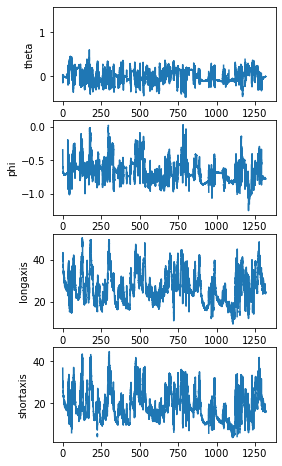

In [18]:
#plot eye variables
fig,axs = plt.subplots(4,1,figsize = (4,8))
for i,val in enumerate(eye_params.ellipse_params[0:4]):
    axs[i].plot(eyeT,eye_params.sel(ellipse_params = val))
    axs[i].set_ylabel(val.values)
    

In [19]:
# calculate eye veloctiy
dEye = np.diff(eye_params.sel(ellipse_params = 'theta'))*180/3.14159
eye_vid.shape

(78706, 240, 320)

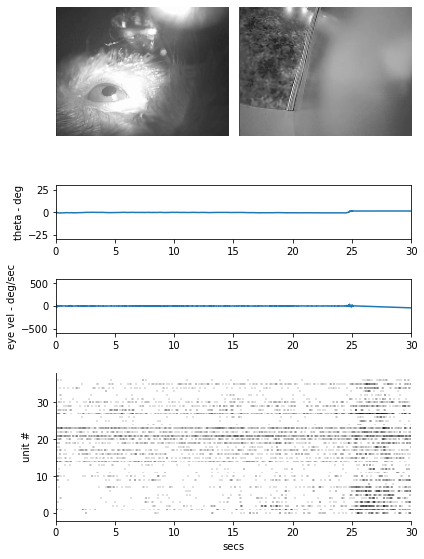

In [20]:
# plot data figure

fig = plt.figure(figsize = (6,8))
gs = fig.add_gridspec(6,2)
axEye = fig.add_subplot(gs[0:2,0])
axWorld = fig.add_subplot(gs[0:2,1])
axTheta = fig.add_subplot(gs[2,:])
axdTheta = fig.add_subplot(gs[3,:])
axR = fig.add_subplot(gs[4:6,:])
#axRad = fig.add_subplot(gs[3,:])

tr = [0,30] # 340-385
fr = np.mean(tr) # time for frame
eyeFr = np.abs(eyeT-fr).argmin(dim = "frame")
worldFr = np.abs(worldT-fr).argmin(dim = "frame")

axEye.cla(); axEye.axis('off'); 
axEye.imshow(eye_vid[eyeFr,:,:],'gray',vmin=0,vmax=255,aspect = "equal")
#axEye.plot(eye_params.sel(ellipse_params = 'X0')[fr]/2,eye_params.sel(ellipse_params = 'Y0')[fr]/2,'r.')
#axEye.set_xlim(40,200); axEye.set_ylim(0,120)

axWorld.cla();  axWorld.axis('off'); 
axWorld.imshow(world_vid[worldFr,:,:],'gray',vmin=0,vmax=255,aspect = "equal")
   
#plot eye position
axTheta.cla()
axTheta.plot(eyeT,0.5*eye_params.sel(ellipse_params = 'theta')*180/3.14159)
axTheta.set_xlim(tr[0],tr[1]); 
axTheta.set_ylabel('theta - deg'); axTheta.set_ylim(-30,30)

# plot eye velocity
axdTheta.cla()
axdTheta.plot(eyeT[0:-1],dEye*60/2); ax.set_ylabel('dtheta')
#sacc = np.transpose(np.where(np.abs(dEye)>10))
#axdTheta.plot(sacc,np.sign(dEye[sacc])*20,'.')
axdTheta.set_xlim(tr[0],tr[1]); 
axdTheta.set_ylim(-10*60,10*60); axdTheta.set_ylabel('eye vel - deg/sec')

#axRad.cla()
#axRad.plot(eye_params.sel(ellipse_params = 'longaxis')[frameRange])
#axRad.set_xlim(0,frameRange[-1]-frameRange[0]); 
#axRad.set_ylabel('radius'); axRad.set_xlabel('frame #'); axRad.set_ylim(0,40)

# plot spikes
axR.fontsize = 20
for i,ind in enumerate(goodcells.index):
    axR.vlines(goodcells.at[ind,'spikeT'],i-0.25,i+0.25,'k',linewidth=0.25)
axR.set_xlim(tr[0],tr[1]); axR.set_xlabel('secs'); axR.set_ylabel('unit #')
axR.spines['right'].set_visible(False)
axR.spines['top'].set_visible(False)

plt.tight_layout()

plt.savefig('cams_eyes_spikes_092820_wn_0_30.pdf')

Text(0, 0.5, 'contrast')

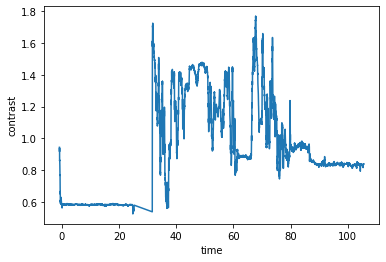

In [21]:
# normalize world movie and calculate contrast
img_norm = (world_vid-np.mean(world_vid,axis=0))/np.std(world_vid,axis=0)
contrast = np.empty(worldT.size)
for i in range(worldT.size):
    contrast[i] = np.std(img_norm[i,:,:])
plt.plot(worldT[0:6000],contrast[0:6000])
plt.xlabel('time')
plt.ylabel('contrast')

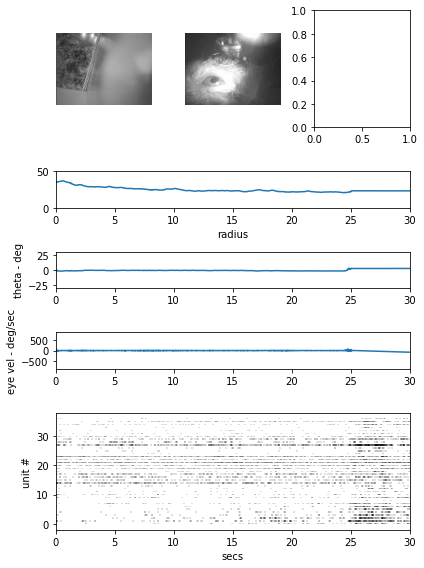

In [22]:
# plot another data figure (with contrast or speed)

fig = plt.figure(figsize = (6,8))
gs = fig.add_gridspec(7,3)
axEye = fig.add_subplot(gs[0:2,1])
axWorld = fig.add_subplot(gs[0:2,0])
axTop = fig.add_subplot(gs[0:2,2])
axTheta = fig.add_subplot(gs[3,:])
axdTheta = fig.add_subplot(gs[4,:])
axVid = fig.add_subplot(gs[2,:])
axR = fig.add_subplot(gs[5:7,:])
#axRad = fig.add_subplot(gs[3,:])

tr = [0,30] # 340-385
fr = np.mean(tr) # time for frame
eyeFr = np.abs(eyeT-fr).argmin(dim = "frame")
worldFr = np.abs(worldT-fr).argmin(dim = "frame")

axEye.cla(); axEye.axis('off'); 
axEye.imshow(eye_vid[eyeFr,:,:],'gray',vmin=0,vmax=255,aspect = "equal")
#axEye.plot(eye_params.sel(ellipse_params = 'X0')[fr]/2,eye_params.sel(ellipse_params = 'Y0')[fr]/2,'r.')
#axEye.set_xlim(40,200); axEye.set_ylim(0,120)

axWorld.cla();  axWorld.axis('off'); 
axWorld.imshow(world_vid[worldFr,:,:],'gray',vmin=0,vmax=255,aspect = "equal")

   
#plot eye position
axTheta.cla()
axTheta.plot(eyeT,eye_params.sel(ellipse_params = 'theta')*180/3.14159)
axTheta.set_xlim(tr[0],tr[1]); 
axTheta.set_ylabel('theta - deg'); axTheta.set_ylim(-30,30)

# grab bag plot -speed / eye vel

#speed
#axdTheta.plot(topT[0:-1],sp); axdTheta.set_ylabel('speed cm/sec')
#axdTheta.set_ylim([0, 15])

#eve velocity
axdTheta.plot(eyeT[0:-1],dEye*60); ax.set_ylabel('dtheta')
#sacc = np.transpose(np.where(np.abs(dEye)>10))
#axdTheta.plot(sacc,np.sign(dEye[sacc])*20,'.')
axdTheta.set_ylim(-15*60,15*60); axdTheta.set_ylabel('eye vel - deg/sec')

axdTheta.set_xlim(tr[0],tr[1]); 

#plot contrast or radius
#axVid.plot(worldT,contrast/2.5)
#axVid.set_ylim([0, 1.1]); axVid.set_ylabel('contrast')

axVid.plot(eyeT,0.5*(eye_params.sel(ellipse_params = 'longaxis') +eye_params.sel(ellipse_params = 'shortaxis')) )
axVid.set_xlabel('radius'); axVid.set_ylim([0, 50])
axVid.set_xlim(tr[0],tr[1]);



# plot spikes
axR.fontsize = 20
for i,ind in enumerate(goodcells.index):
    axR.vlines(goodcells.at[ind,'spikeT'],i-0.25,i+0.25,'k',linewidth=0.25)
axR.set_xlim(tr[0],tr[1]); axR.set_xlabel('secs'); axR.set_ylabel('unit #')
#axR.spines['right'].set_visible(False)
#axR.spines['top'].set_visible(False)

plt.tight_layout()

plt.savefig('cams_eyes_R_move_spikes_101520_wn_0_30.pdf')

In [23]:
# set up interpolators for eye and world videos
eyeInterp = interp1d(eyeT,eye_vid,axis=0)
worldInterp = interp1d(worldT,world_vid,axis=0)

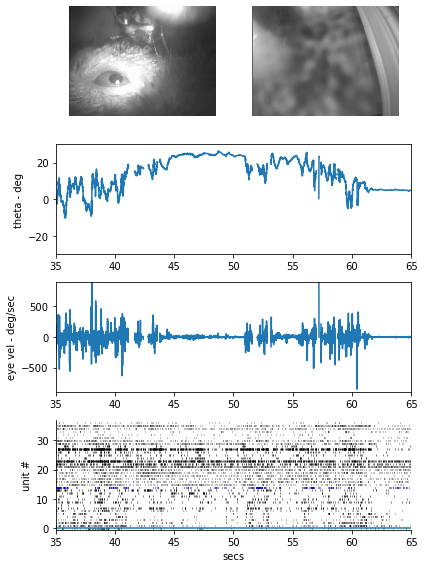

In [58]:
# make movie and sound

#unit to plot/record
this_unit = 14

#set up figure
fig = plt.figure(figsize = (6,8))
gs = fig.add_gridspec(4,2)
axEye = fig.add_subplot(gs[0,0])
axWorld = fig.add_subplot(gs[0,1])
axTheta = fig.add_subplot(gs[1,:])
axdTheta = fig.add_subplot(gs[2,:])
axR = fig.add_subplot(gs[3,:])
#axRad = fig.add_subplot(gs[3,:])

#timerange and center frame (only)
tr = [35, 65]
fr = np.mean(tr) # time for frame
eyeFr = np.abs(eyeT-fr).argmin(dim = "frame")
worldFr = np.abs(worldT-fr).argmin(dim = "frame")

axEye.cla(); axEye.axis('off'); 
axEye.imshow(eye_vid[eyeFr,:,:],'gray',vmin=0,vmax=255,aspect = "equal")
#axEye.plot(eye_params.sel(ellipse_params = 'X0')[fr]/2,eye_params.sel(ellipse_params = 'Y0')[fr]/2,'r.')
#axEye.set_xlim(0,160); axEye.set_ylim(0,120)

axWorld.cla();  axWorld.axis('off'); 
axWorld.imshow(world_vid[worldFr,:,:],'gray',vmin=0,vmax=255,aspect = "equal")
   
#plot eye position
axTheta.cla()
axTheta.plot(eyeT,eye_params.sel(ellipse_params = 'theta')*180/3.14159)
axTheta.set_xlim(tr[0],tr[1]); 
axTheta.set_ylabel('theta - deg'); axTheta.set_ylim(-30,30)

# plot eye velocity
axdTheta.cla()
axdTheta.plot(eyeT[0:-1],dEye*60); ax.set_ylabel('dtheta')
#sacc = np.transpose(np.where(np.abs(dEye)>10))
#axdTheta.plot(sacc,np.sign(dEye[sacc])*20,'.')
axdTheta.set_xlim(tr[0],tr[1]); 
axdTheta.set_ylim(-900,900); axdTheta.set_ylabel('eye vel - deg/sec')

#plot radius?
#axRad.cla()
#axRad.plot(eye_params.sel(ellipse_params = 'longaxis')[frameRange])
#axRad.set_xlim(0,frameRange[-1]-frameRange[0]); 
#axRad.set_ylabel('radius'); axRad.set_xlabel('frame #'); axRad.set_ylim(0,40)

# plot spikes
axR.fontsize = 20
for i,ind in enumerate(goodcells.index):
    axR.vlines(goodcells.at[ind,'spikeT'],i-0.25,i+0.25,'k',linewidth=0.5)
axR.vlines(goodcells.at[units[this_unit],'spikeT'],this_unit-0.25,this_unit+0.25,'b',linewidth=0.5)

axR.set_xlim(tr[0],tr[1]); axR.set_ylim(-0.5 , n_units); axR.set_xlabel('secs'); axR.set_ylabel('unit #')
axR.spines['right'].set_visible(False)
axR.spines['top'].set_visible(False)

plt.tight_layout()

vidfile = name_base + '_' + str(this_unit) + '.mp4'
# now animate
writer = FFMpegWriter(fps=30)
with writer.saving(fig, vidfile, 100):
    for t in np.arange(tr[0],tr[1],1/30):
        
        # show eye and world frames
        axEye.cla(); axEye.axis('off'); 
        axEye.imshow(eyeInterp(t),'gray',vmin=0,vmax=255,aspect = "equal")
        #axEye.set_xlim(0,160); axEye.set_ylim(0,120)
        
        axWorld.cla(); axWorld.axis('off'); 
        axWorld.imshow(worldInterp(t),'gray',vmin=0,vmax=255,aspect = "equal")
        
        #plot line for time, then remove
        ln = axR.vlines(t,-0.5,30,'b')
        writer.grab_frame()
        ln.remove()
        
###



# generate wave file
sp =np.array(ephys_data.at[units[this_unit],'spikeT'])-tr[0]
sp = sp[sp>0]
datarate = 30000

# Compute waveform samples
tmax = tr[1]-tr[0]
t = np.linspace(0, tr[1]-tr[0], (tr[1]-tr[0])*datarate,endpoint=False)
x = np.zeros(np.size(t))
for spt in sp[sp<tmax]:
    x[np.int64(spt*datarate) : np.int64(spt*datarate +30)] = 1
    x[np.int64(spt*datarate)+31 : np.int64(spt*datarate +60)] =- 1
plt.plot(x)
    

# Write the samples to a file
audfile = name_base + '_' + str(this_unit) + '.wav'
wavio.write(audfile, x, datarate, sampwidth=1)

In [63]:
subprocess.call([r'C:\Program Files\ffmpeg\bin\ffmpeg.exe', '-i', vidfile, '-i', audfile, '-c:v', 'copy', '-c:a', 'aac', vidfile[0:-4] + '_merge.mp4']) 

0

In [62]:
vidfile

'112920_G6H27P8LT_control_Rig2_fm1_14.mp4'

In [26]:
# normalize world video
std_im = np.std(world_vid,axis=0);
std_im[std_im<10] = 10;
img_norm = (world_vid-np.mean(world_vid,axis=0))/std_im


Text(0.5, 1.0, 'mean of image')

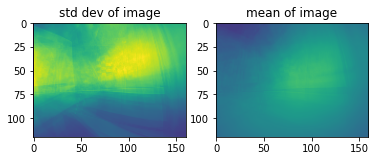

In [27]:
plt.subplot(1,2,1)
plt.imshow(std_im)
plt.title('std dev of image')
plt.subplot(1,2,2)
plt.imshow(np.mean(world_vid,axis=0),vmin=0,vmax=255)
plt.title('mean of image')

Text(0, 0.5, 'contrast')

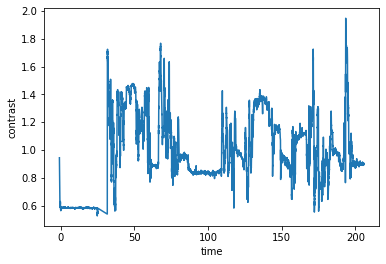

In [28]:
#calculate image contrast
contrast = np.empty(worldT.size)
for i in range(worldT.size):
    contrast[i] = np.std(img_norm[i,:,:])
plt.plot(worldT[0:12000],contrast[0:12000])
plt.xlabel('time')
plt.ylabel('contrast')


In [29]:
#set up timebase for subsequent analysis
dt = 0.025
t = np.arange(0, np.max(worldT),dt)

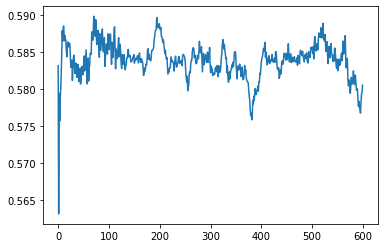

In [30]:
# interpolate and plot contrast
newc =interp1d(worldT,contrast)
contrast_interp = newc(t[0:-1])
contrast_interp.shape
plt.plot(contrast_interp[0:600])

In [31]:
# calculate firing rate at new timebase
ephys_data['rate'] = nan
ephys_data['rate'] = ephys_data['rate'].astype(object)
for i,ind in enumerate(ephys_data.index):
    ephys_data.at[ind,'rate'],bins = np.histogram(ephys_data.at[ind,'spikeT'],t)
ephys_data['rate']= ephys_data['rate']/dt
goodcells = ephys_data.loc[ephys_data['group']=='good']
goodcells

Amplitude  ContamPct KSLabel         amp  ch  depth         fr group  \
15      2160.8       11.9     mua   79.412674  12    301   6.254460  good   
16       869.9       31.4     mua   59.958950  12    301  10.218793  good   
18      1040.6       33.4     mua   61.743778  13    326   7.828308  good   
21       883.6       38.9     mua   59.234821  14    351   6.729488  good   
24      3570.3        0.0    good   89.894104  15    376   3.557785  good   
26      2415.8        1.5    good   78.313988  16    401   2.885978  good   
27      1002.7       46.9     mua   63.726906  16    401   5.703476  good   
28       775.9       32.6     mua   51.069412  16    401   6.403226  good   
32      2457.8        0.0    good   93.777863  19    476   1.315672  good   
33       790.8       29.1     mua   60.238327  19    476   7.303299  good   
35       935.3       11.7     mua   67.732697  20    501   5.969129  good   
39       864.7       11.5     mua   64.742691  21    526   2.845441  good   
46      1502.5        2.0    good   85.775375  24    601   2.674636  good   
51       924.9       18.5     mua   67.187027  25    626   4.230380  good   
53      1545.2        2.5    good   75.941292  26    651   5.785336  good   
55      1822.2        1.8    good   68.884239  27    676   6.904622  good   
56       913.7       23.0     mua   69.226402  27    676   9.916539  good   
57       889.3       27.3     mua   67.228287  27    676   8.199435  good   
58      1052.4       11.7     mua   61.760941  28    701   8.741761  good   
59       950.7       18.4     mua   73.043976  29    726  11.876469  good   
60       825.3       26.4     mua   61.497551  29    726  10.590708  good   
62       994.5       26.0     mua   70.752029  30    751  20.703240  good   
63       813.7       42.7     mua   57.609051  30    751  11.209778  good   
64       994.7       35.0     mua   67.423256  31    776  16.834542  good   
87      1561.8        4.0    good   87.447449  47    376   2.524296  good   
88       832.5       38.9     mua   66.704330  47    376   3.120933  good   
91      1074.0       25.5     mua   81.484962  49    426   3.395245  good   
94      1854.3        1.5    good  127.111038  51    476  29.929868  good   
97      1231.8       11.8     mua   93.831490  53    526   4.119002  good   
110     1261.4       26.7     mua   86.140884  59    676  12.726166  good   
111      883.1       28.4     mua   68.457222  59    676  10.797327  good   
116     1372.0       22.4     mua   93.511139  61    726   3.793134  good   
126      991.0        0.0    good   78.287888  59    676   1.203901  good   
136     1382.7        7.7    good   67.607002  21    526   3.460576  good   
143     2128.0       11.5     mua   94.053032  61    726   8.634320  good   
144     1224.5        4.9    good   63.750702  63    776  11.228669  good   
146     1020.7        9.8    good   89.036011  63    776   1.737569  good   

     n_spikes  sh                                           waveform  \
15      15892   0  [0.0627714917, 0.0641448572, 0.0679046735, 0.0...   
16      25965   0  [0.05998256800000001, 0.0599321723, 0.06218858...   
18      19891   0  [0.0508984923, 0.0510096326, 0.0536281131, 0.0...   
21      17099   0  [0.0517281294, 0.0529106073, 0.0553440973, 0.0...   
24       9040   0  [0.044679161200000005, 0.0453956835, 0.0471456...   
26       7333   0  [0.042958077000000004, 0.0426433757, 0.0449213...   
27      14492   0  [0.0470460653, 0.0470357314, 0.0496502705, 0.0...   
28      16270   0  [0.0250957888, 0.0256573316, 0.026968291000000...   
32       3343   0  [0.0477149412, 0.0467640646, 0.0496346168, 0.0...   
33      18557   0  [0.046791389600000004, 0.0454973988, 0.0475151...   
35      15167   0  [0.0418322645, 0.042151615, 0.0447975174, 0.04...   
39       7230   0  [0.033192765, 0.0449915417, 0.0444562808000000...   
46       6796   0  [0.0543990657, 0.0525485575, 0.055297523700000...   
51      10749   0  [0.048665110000000004, 0.0481436998, 0.0503664...  

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Text(0, 0.5, 'sp/sec')

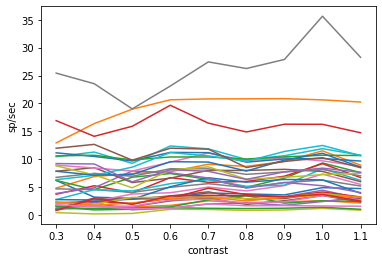

In [34]:
# calculate contrast - response functions
# mean firing rate in timebins correponding to contrast ranges
resp = np.empty((n_units,12))
crange = np.arange(0,1.2,0.1)
for i,ind in enumerate(goodcells.index):
    for c,cont in enumerate(crange):
        resp[i,c] = np.mean(goodcells.at[ind,'rate'][(contrast_interp>cont) & (contrast_interp<(cont+0.1))])
plt.plot(crange,np.transpose(resp))
#plt.ylim(0,10)
plt.xlabel('contrast')
plt.ylabel('sp/sec')
    

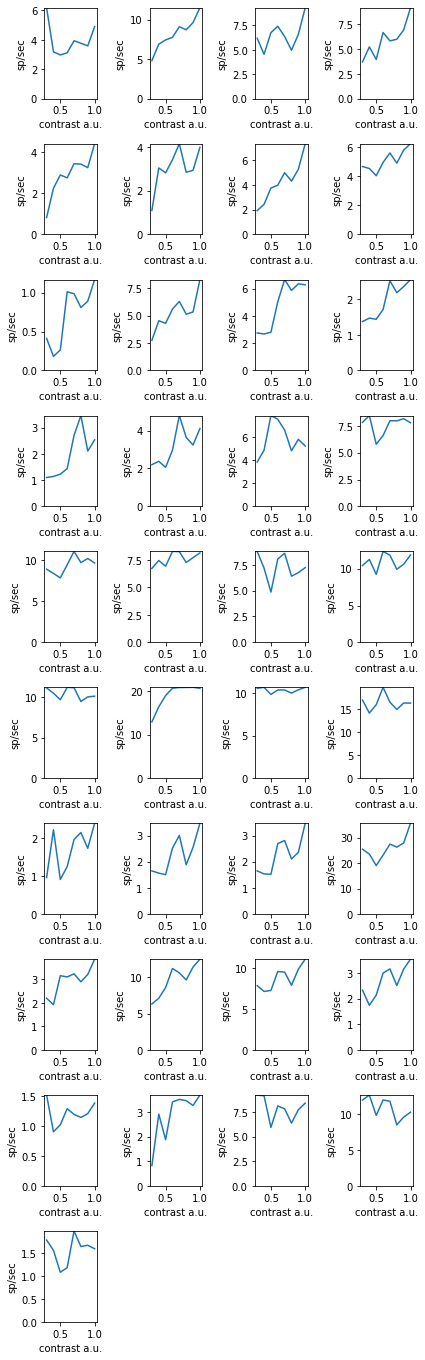

In [35]:
# plot individual contrast response functions in subplots
fig = plt.figure(figsize = (6,np.ceil(n_units/2)))
for i, ind in enumerate(goodcells.index):
    plt.subplot(np.ceil(n_units/4),4,i+1)
    plt.plot(crange[2:-1],resp[i,2:-1])
   # plt.ylim([0 , max(resp[i,1:-3])*1.2])
    plt.xlabel('contrast a.u.'); plt.ylabel('sp/sec'); plt.ylim([0,np.nanmax(resp[i,2:-1])])
plt.tight_layout()
plt.savefig(name_base + '_contrast.pdf')

In [36]:
# create interpolator for movie data so we can evaluate at same timebins are firing rat
img_norm[img_norm<-2] = -2
movInterp = interp1d(worldT,img_norm,axis=0)

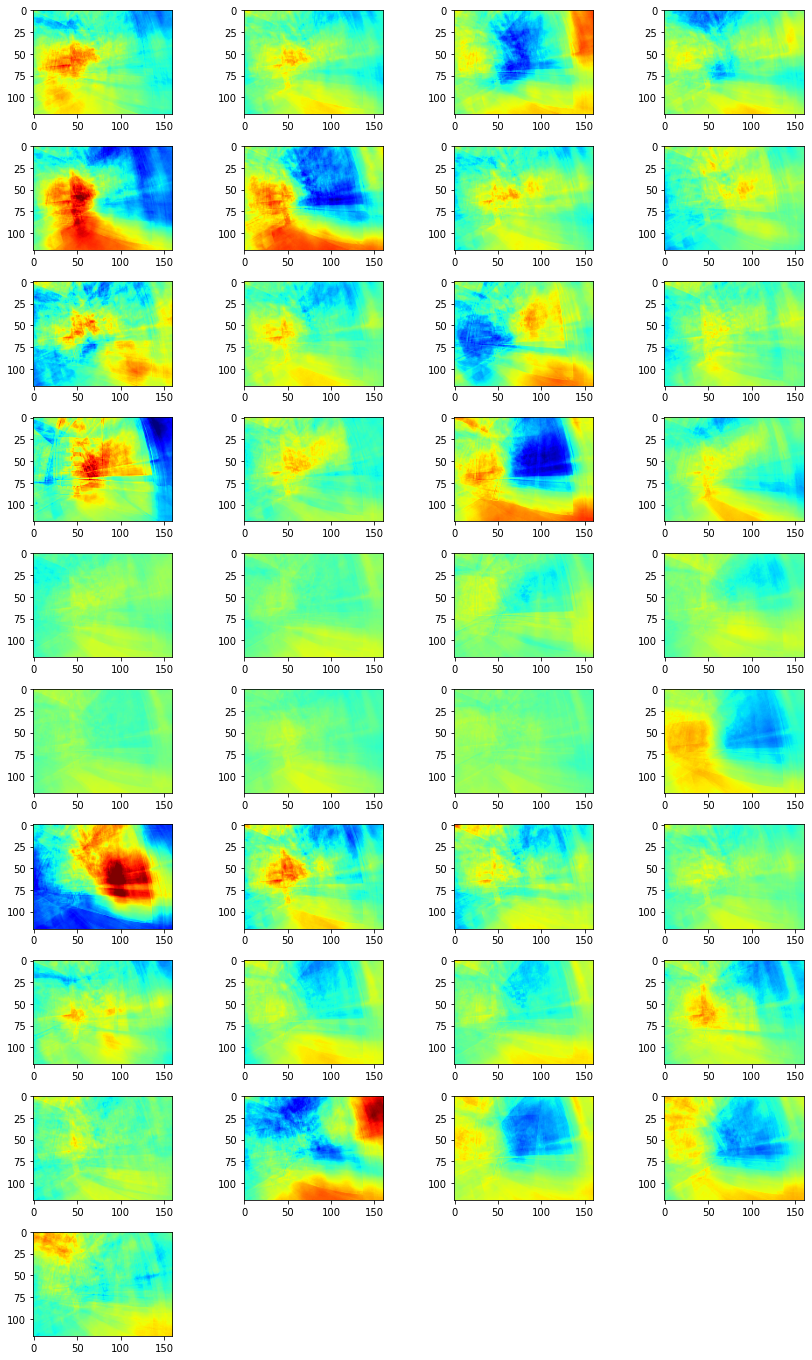

In [37]:
# calculate spike-triggered average
sta = 0
lag = 0.075
plt.figure(figsize = (12,np.ceil(n_units/2)))
for c, ind in enumerate(goodcells.index):
    r = goodcells.at[ind,'rate']
    sta = 0
    for i in range(100,t.size-100):
        if r[i]>0:
            sta = sta+r[i]*(movInterp(t[i]-lag))
    plt.subplot(np.ceil(n_units/4),4,c+1)
    sta = sta/np.sum(r)
    #sta[abs(sta)<0.1]=0
    plt.imshow((sta-np.mean(sta) ),vmin=-0.3,vmax=0.3,cmap = 'jet')
plt.tight_layout()
plt.savefig(name_base + '_sta.pdf')


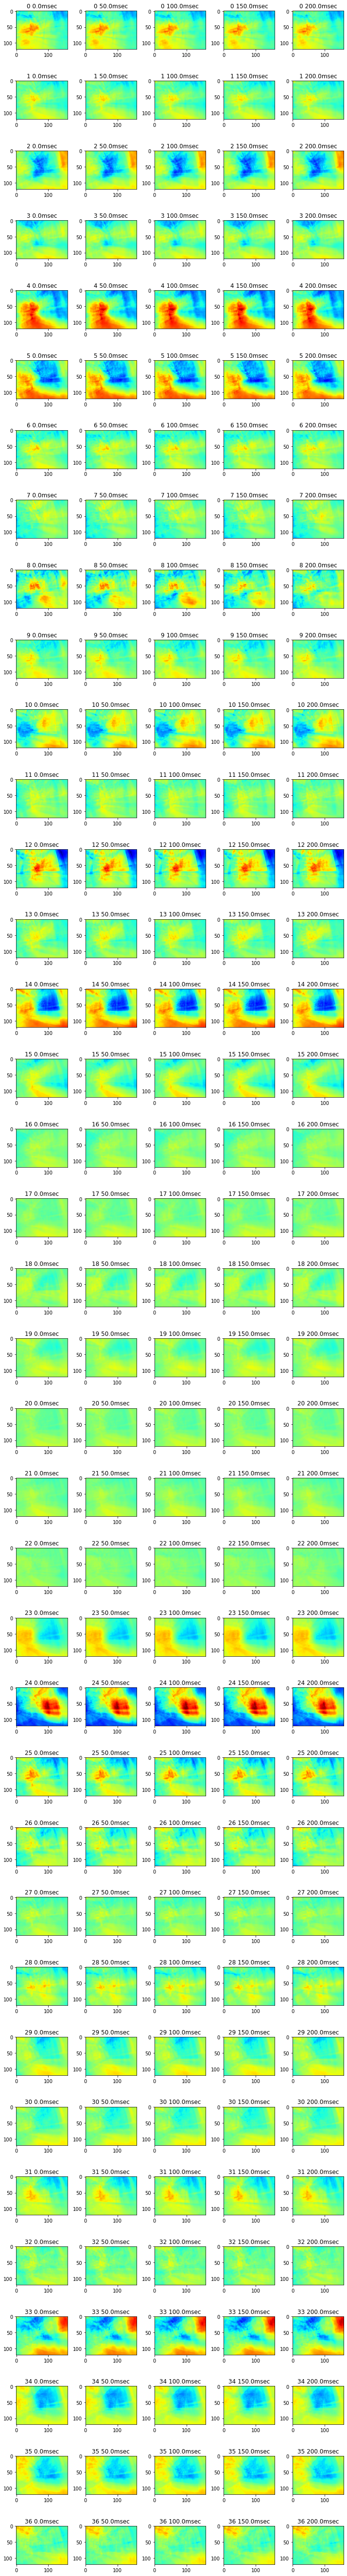

In [38]:
# calculate spike-triggered average
spike_corr = 1 + 0.125/1200
sta = 0
lag = 0.075
lagRange = np.arange(0,0.25,0.05)
plt.figure(figsize = (12,2*n_units))
for c, ind in enumerate(goodcells.index):
    sp = goodcells.at[ind,'spikeT'].copy()
    for  lagInd, lag in enumerate(lagRange):
        sta = 0; nsp = 0
        for s in sp:
            if (s-lag >5) & ((s-lag)*spike_corr <np.max(worldT)):
                nsp = nsp+1
                sta = sta+movInterp((s-lag)*spike_corr)
        plt.subplot(n_units,6,(c*6)+lagInd + 1)
        sta = sta/nsp
    #sta[abs(sta)<0.1]=0
        plt.imshow(sta ,vmin=-0.35,vmax=0.35,cmap = 'jet')
        plt.title(str(c) + ' ' + str(np.round(lag*1000)) + 'msec')
plt.tight_layout()
plt.savefig(name_base +'_staLag.pdf')

In [39]:
lag

0.2

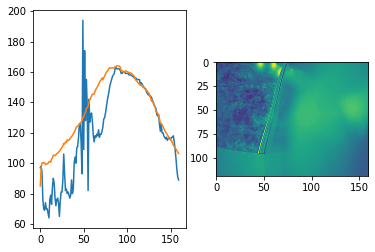

In [40]:
# some testing of video
thisT = 200
plt.subplot(1,2,1)
plt.plot(world_vid[thisT,75,:])
plt.plot(np.mean(world_vid[:,75,:],axis=0))
plt.subplot(1,2,2)
plt.imshow(world_vid[thisT,:,:],vmin=0,vmax=255)

Text(0.5, 0, 'pixel intensity')

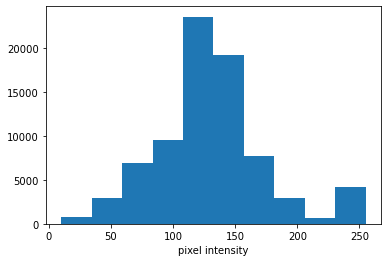

In [41]:
plt.hist(world_vid[:,75,50])
plt.xlabel('pixel intensity')

(0.0, 60.0)

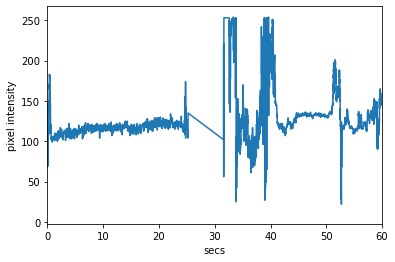

In [42]:
plt.plot(worldT,world_vid[:,75,50])
plt.xlabel('secs'); plt.ylabel('pixel intensity')
plt.xlim(0,60)

(0.0, 60.0)

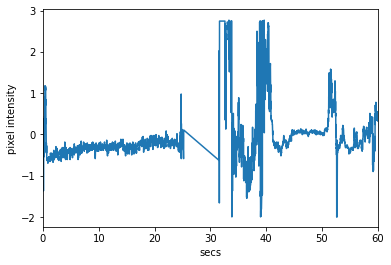

In [43]:
plt.plot(worldT,img_norm[:,75,50])
plt.xlabel('secs'); plt.ylabel('pixel intensity')
plt.xlim(0,60)

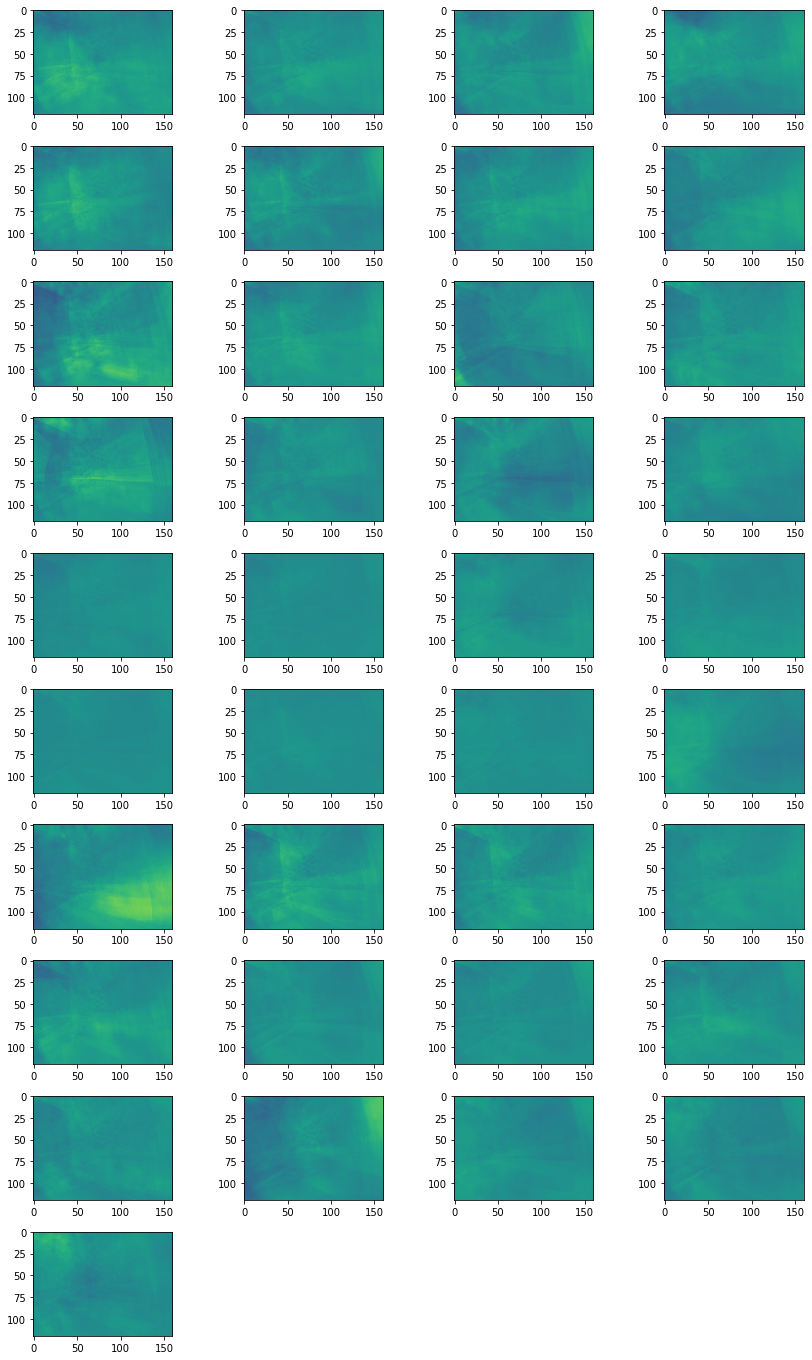

In [44]:
# calculate spike-triggered variance
sta = 0
lag = 0.1
plt.figure(figsize = (12,np.ceil(n_units/2)))
for c, ind in enumerate(goodcells.index):
    r = goodcells.at[ind,'rate']
    sta = 0
    for i in range(5,t.size-10):
        sta = sta+r[i]*(movInterp(t[i]-lag))**2
    plt.subplot(np.ceil(n_units/4),4,c+1)
    sta = sta/np.sum(r)
    plt.imshow(sta - np.mean(img_norm**2,axis=0),vmin=-1,vmax=1)
plt.tight_layout()

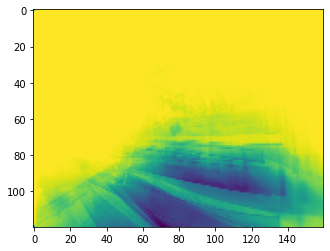

In [45]:
plt.imshow(np.mean(img_norm**2,axis=0))

<ipython-input-55-5773016a60dd>:5: RuntimeWarning: invalid value encountered in greater
  upsacc = eyeT[np.append(dEye,0)>sthresh]
<ipython-input-55-5773016a60dd>:7: RuntimeWarning: invalid value encountered in less
  downsacc= eyeT[np.append(dEye,0)<-sthresh]


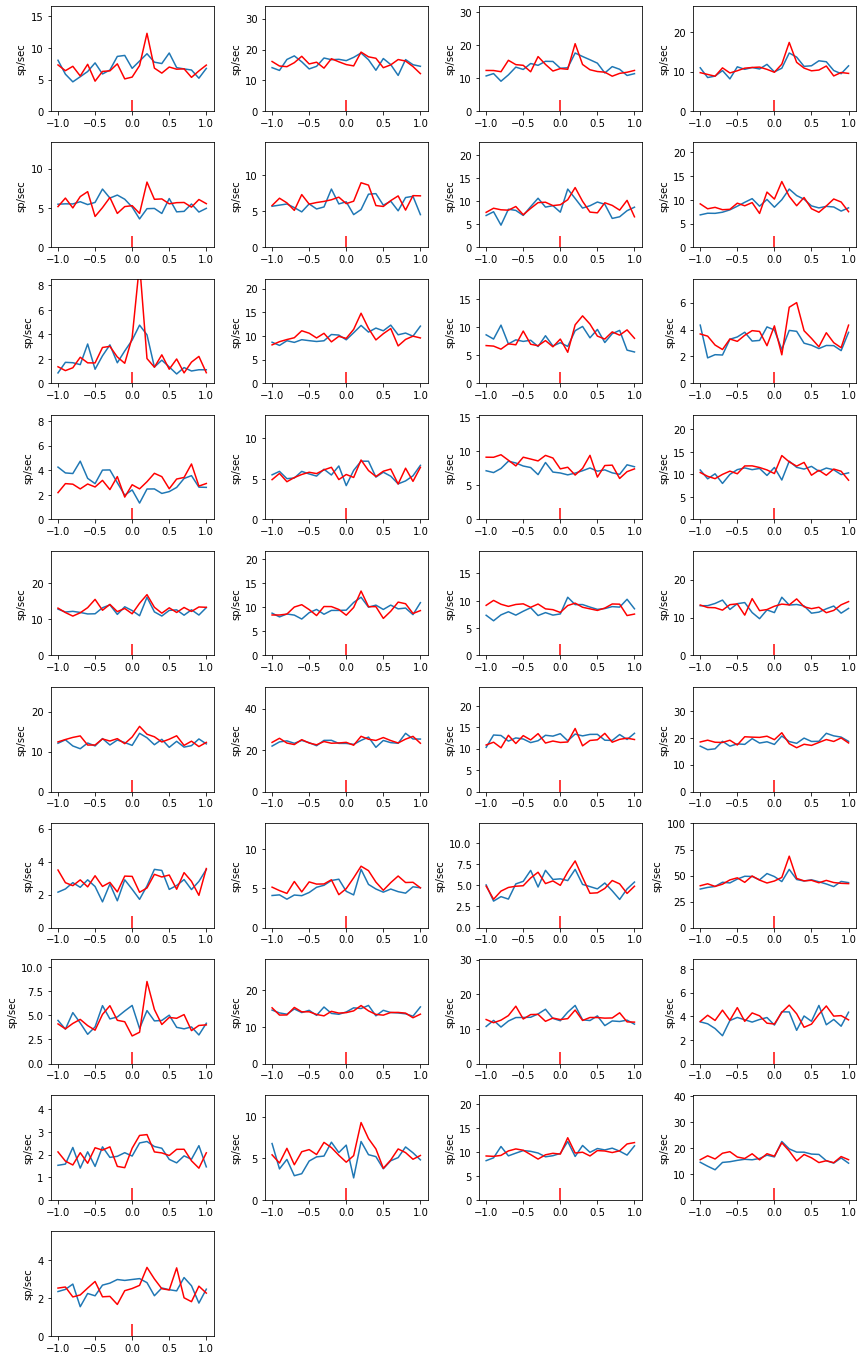

In [55]:
# calculate saccade-locked psth
fig = plt.figure(figsize = (12,np.ceil(n_units/2)))
trange = np.arange(-1,1.1,0.1)
sthresh = 6;
upsacc = eyeT[np.append(dEye,0)>sthresh]
upsacc = upsacc[upsacc>5]
downsacc= eyeT[np.append(dEye,0)<-sthresh]
downsacc = downsacc[downsacc>5]
upsacc_avg = np.zeros((units.size,trange.size))
downsacc_avg = np.zeros((units.size,trange.size))
for i, ind in enumerate(goodcells.index):
    rateInterp = interp1d(t[0:-1],goodcells.at[ind,'rate'])
    for s in upsacc:
        upsacc_avg[i,:] = upsacc_avg[i,:]+ rateInterp(np.array(s)+trange)/upsacc.size
    for s in downsacc:
        downsacc_avg[i,:]= downsacc_avg[i,:]+ rateInterp(np.array(s)+trange)/downsacc.size
    plt.subplot(np.ceil(n_units/4),4,i+1)
    plt.plot(trange,upsacc_avg[i,:])
    plt.plot(trange,downsacc_avg[i,:],'r')
    plt.vlines(0,0,np.max(upsacc_avg[i,:]*0.2),'r')
    plt.ylim([0, np.max(upsacc_avg[i,:])*1.8])
    plt.ylabel('sp/sec')
plt.tight_layout()
plt.savefig(name_base + '_saccade.pdf')
        


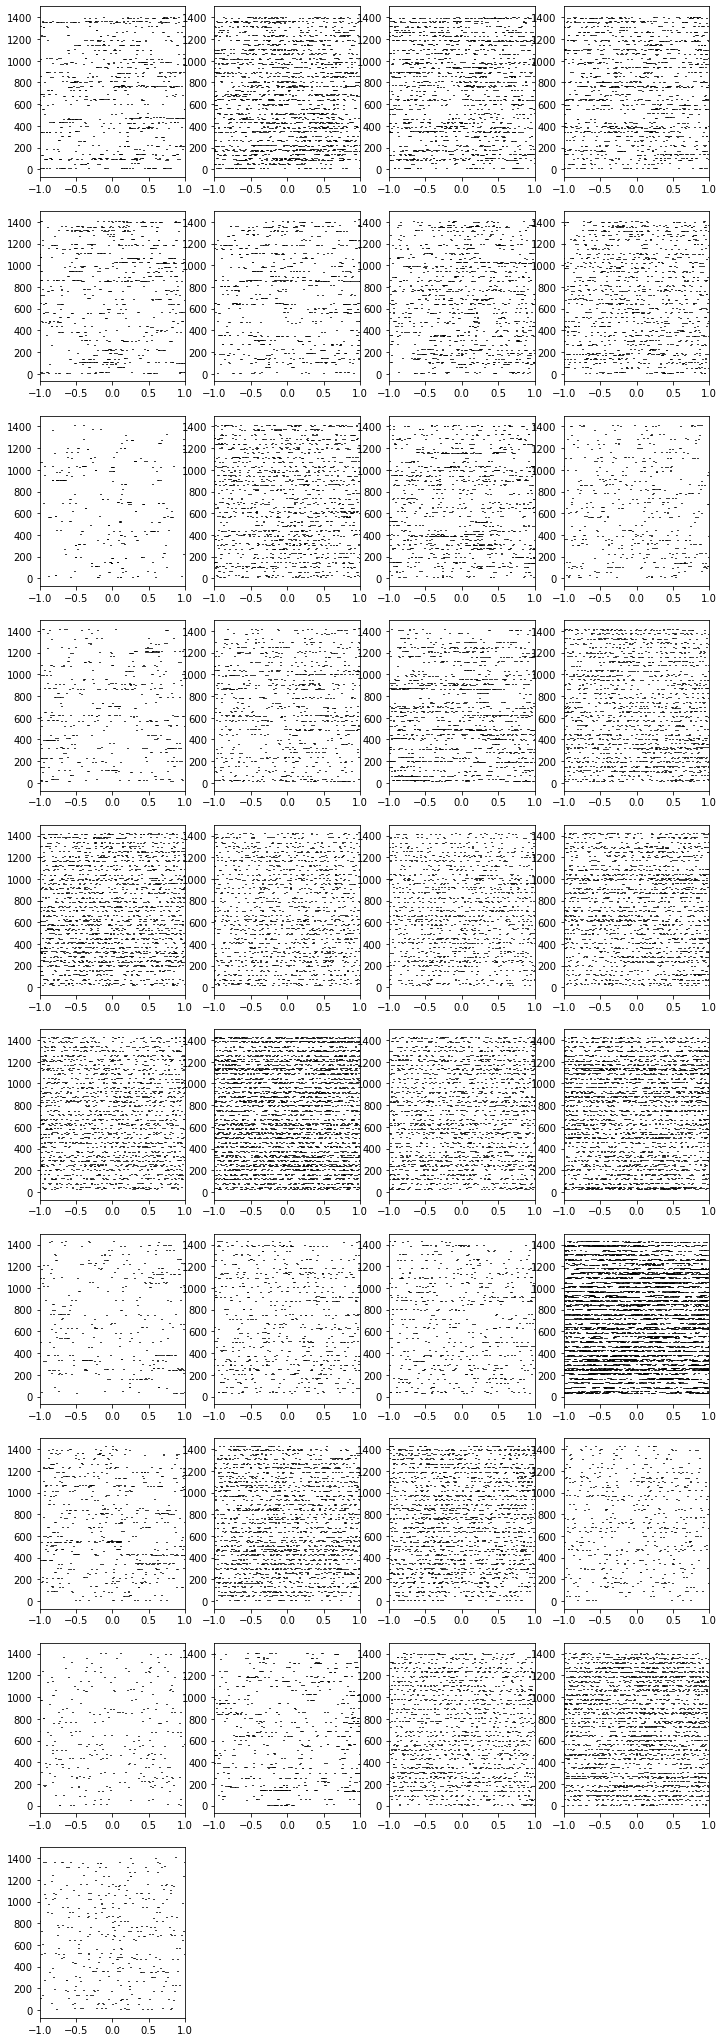

In [47]:
fig = plt.figure(figsize = (12,n_units))
for i, ind in enumerate(goodcells.index):
    sp = np.array(goodcells.at[units[i],'spikeT'])
    plt.subplot(np.ceil(n_units/4),4,i+1)
    n = 0
    for s in upsacc:
        n= n+1
        sd = np.abs(sp-np.array(s))<10
        sacc_sp = sp[sd]
        plt.vlines(sacc_sp-np.array(s),n-0.25,n+0.25)
    plt.xlim(-1,1)


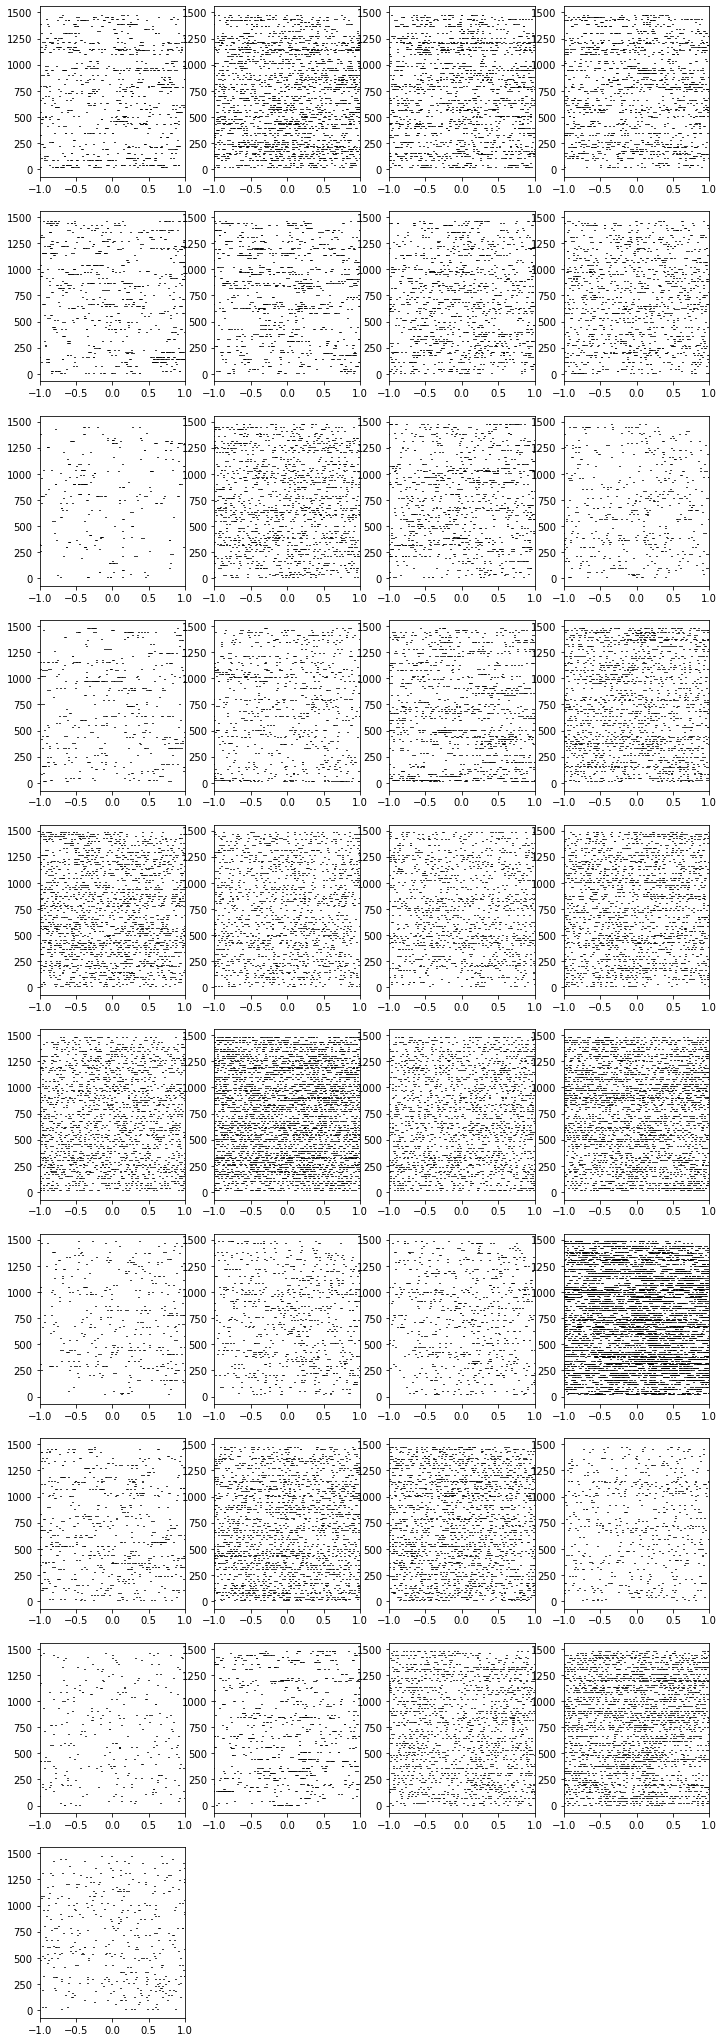

In [48]:
fig = plt.figure(figsize = (12,n_units))
for i, ind in enumerate(goodcells.index):
    sp = np.array(goodcells.at[units[i],'spikeT'])
    plt.subplot(np.ceil(n_units/4),4,i+1)
    n = 0
    for s in downsacc:
        n= n+1
        sd = np.abs(sp-np.array(s))<10
        sacc_sp = sp[sd]
        plt.vlines(sacc_sp-np.array(s),n-0.25,n+0.25)
    plt.xlim(-1,1)

Text(0, 0.5, 'normalized pupil R')

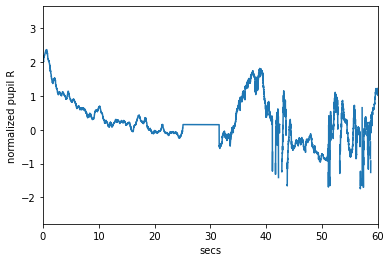

In [49]:
# normalize and plot eye radius
eyeR = eye_params.sel(ellipse_params = 'longaxis').copy()
Rnorm = (eyeR - np.mean(eyeR))/np.std(eyeR)
plt.plot(eyeT,Rnorm)
plt.xlim([0,60])
plt.xlabel('secs')
plt.ylabel('normalized pupil R')


C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([  395.,  5825., 13180., 17889., 16174.,  9737.,  7347.,  3914.,
         1342.,   548.]),
 array([-2.48532484, -1.90166471, -1.31800457, -0.73434444, -0.15068431,
         0.43297582,  1.01663595,  1.60029608,  2.18395621,  2.76761634,
         3.35127647]),
 <a list of 10 Patch objects>)

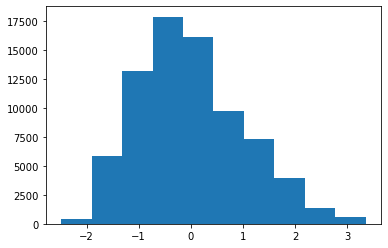

In [50]:
plt.hist(Rnorm)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:216: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:185: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


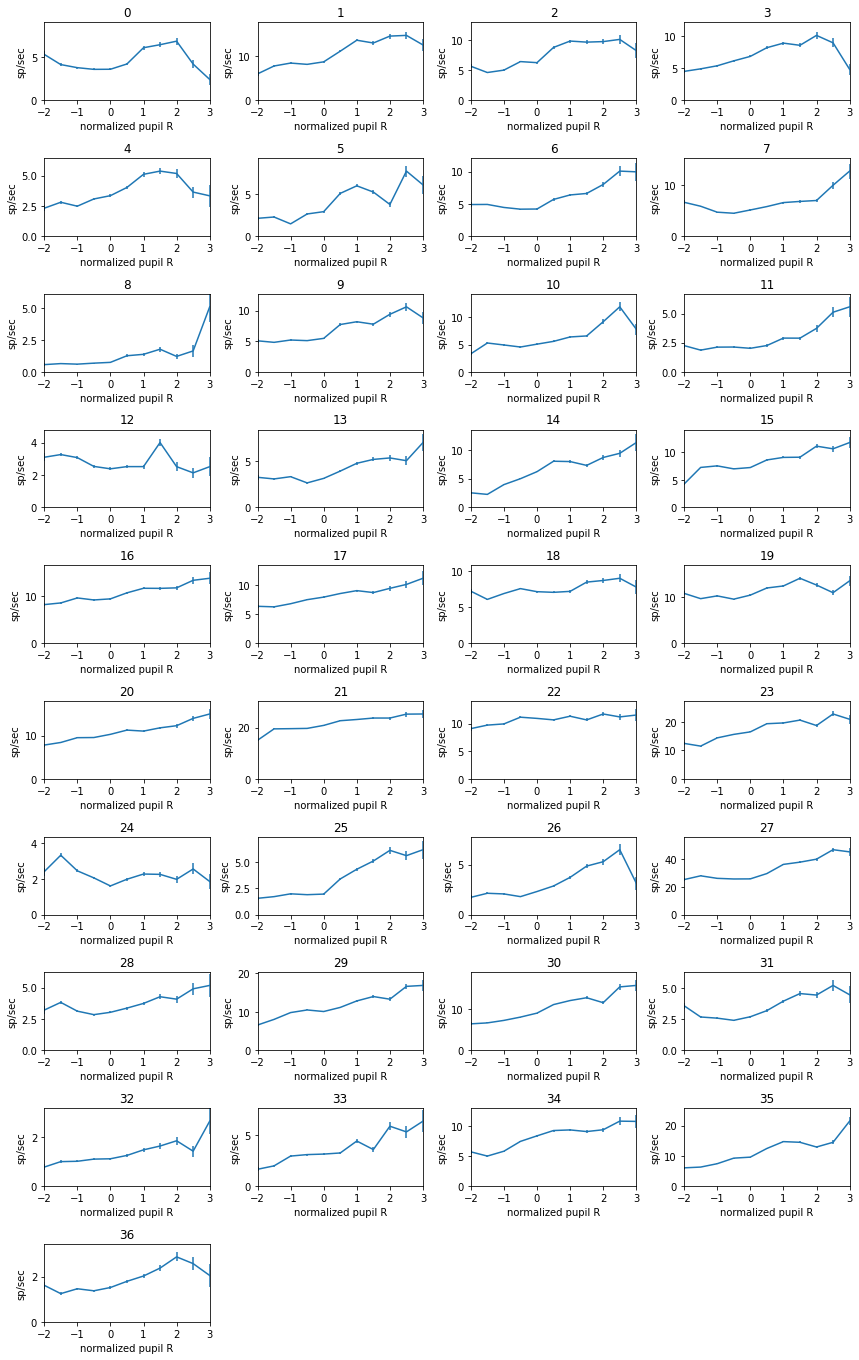

In [51]:
# plot rate vs pupil
n_units = len(goodcells)
R_range = np.arange(-4,4,0.5)
useEyeT = eyeT[(eyeT<t[-2]) & (eyeT>t[0])].copy()
useR = Rnorm[(eyeT<t[-2]) & (eyeT>t[0])].copy()
R_scatter = np.zeros((n_units,len(useR)))
R_tuning = np.zeros((n_units,len(R_range)-1))
R_tuning_err =R_tuning.copy()
for i, ind in enumerate(goodcells.index):
    rateInterp = interp1d(t[0:-1],goodcells.at[ind,'rate'])
    R_scatter[i,:] = rateInterp(useEyeT)
    for j in range(len(R_range)-1):
        usePts =(useR>R_range[j]) & (useR<R_range[j+1])
        R_tuning[i,j] = np.mean(R_scatter[i,usePts])
        R_tuning_err[i,j] = np.std(R_scatter[i,usePts])/np.sqrt(np.count_nonzero(usePts))

fig = plt.figure(figsize = (12,np.ceil(n_units/2)))
for i in range(n_units):
    plt.subplot(np.ceil(n_units/4),4,i+1)
    plt.errorbar(R_range[:-1],R_tuning[i,:],yerr=R_tuning_err[i,:])
    plt.ylim(0,np.nanmax(R_tuning[i,:]*1.2))
    plt.xlim([-2, 3])
    plt.xlabel('normalized pupil R'); plt. ylabel('sp/sec'); plt.title(i)
        
        
plt.tight_layout()

plt.savefig(name_base + '_pupil_R.pdf')

Text(0, 0.5, 'normalized eye theta')

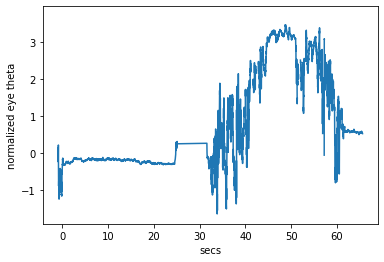

In [52]:
eyeTheta = eye_params.sel(ellipse_params = 'theta').copy()
thetaNorm = (eyeTheta - np.mean(eyeTheta))/np.std(eyeTheta)
plt.plot(eyeT[0:3600],thetaNorm[0:3600])
plt.xlabel('secs'); plt.ylabel('normalized eye theta')

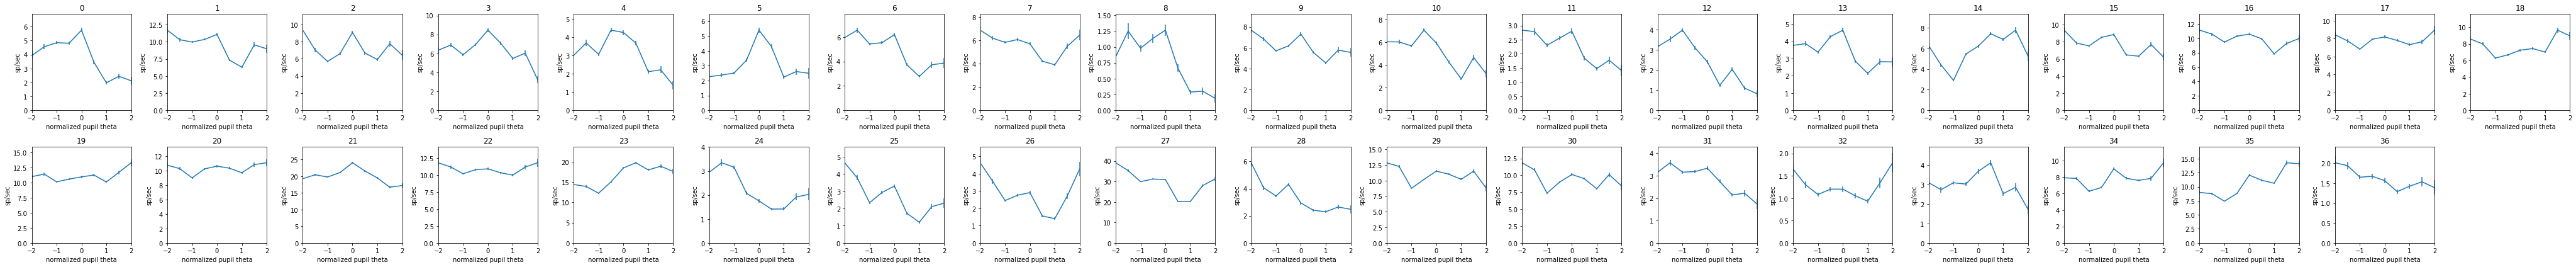

In [53]:
# plot rate vs theta
n_units = len(goodcells)
th_range = np.arange(-2,3,0.5)
useEyeT = eyeT[(eyeT<t[-2]) & (eyeT>t[0])].copy()
useTh = thetaNorm[(eyeT<t[-2]) & (eyeT>t[0])].copy()
th_scatter = np.zeros((n_units,len(useR)))
th_tuning = np.zeros((n_units,len(th_range)-1))
th_tuning_err =th_tuning.copy()
for i, ind in enumerate(goodcells.index):
    rateInterp = interp1d(t[0:-1],goodcells.at[ind,'rate'])
    th_scatter[i,:] = rateInterp(useEyeT)
    for j in range(len(th_range)-1):
        usePts =(useTh>th_range[j]) & (useTh<th_range[j+1])
        th_tuning[i,j] = np.mean(th_scatter[i,usePts])
        th_tuning_err[i,j] = np.std(th_scatter[i,usePts])/np.sqrt(np.count_nonzero(usePts))

fig = plt.figure(figsize = (3*np.ceil(n_units/2),6))
for i in range(n_units):
    plt.subplot(2,np.ceil(n_units/2),i+1)
    plt.errorbar(th_range[:-1],th_tuning[i,:],yerr=th_tuning_err[i,:])
    plt.ylim(0,np.nanmax(th_tuning[i,:]*1.2))
    plt.xlim([-2, 2])
    plt.xlabel('normalized pupil theta'); plt. ylabel('sp/sec'); plt.title(i)
        
        
plt.tight_layout()

plt.savefig(name_base + '_pupil_theta.pdf')

In [54]:
sp

array([2.23133333e-01, 4.26333333e-01, 4.68823333e+00, ...,
       1.31707090e+03, 1.31728480e+03, 1.31765950e+03])